In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.2)

import pandas as pd
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import *
from data_generating_funcs import *

In [3]:
df = pd.read_csv('../results/coverage_width50_iter100.csv')
df['hit'] = df.apply(lambda x: calculate_cvg(x.vi, x.se, x.true_vi), axis=1)
df['method'] = df.method.apply(lambda x: x.title())
df.loc[df.method == 'Lazy', 'method'] = 'LazyVI'

df2 = df[df.variable!='all']
df2['Error'] = df2.vi - df2.true_vi

df2.loc[df2.variable.isin(['X1', 'X2']), 'Variable type'] = 'Important, correlated'
df2.loc[df2.variable.isin(['X3']), 'Variable type'] = 'Important, uncorrelated'
df2.loc[df2.variable.isin(['X4', 'X5', 'X6']), 'Variable type'] = 'Unimportant, uncorrelated'

In [10]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

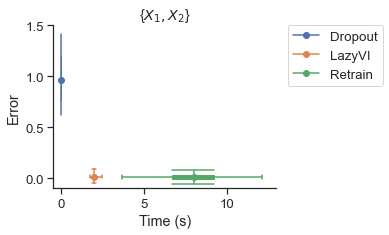

In [53]:
for grp in ['Important, correlated']:
    fig,ax = plt.subplots(figsize=(4,3))
    plt.ylim(-.1, 1.5)
    plt.xlim(-.5, 13)
    plt.xlabel('Time (s)')
    plt.ylabel('Error')
    d = df2[df2['Variable type'] == grp]
    colors = ['b', 'orange', 'g']

    for i, method in enumerate(['Dropout', 'LazyVI', 'Retrain']):

        d2 = d[d.method==method]
        boxplot_2d(d2.time, d2.Error, ax=ax, co=sns.color_palette()[i], method=method)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Only show ticks on the left and bottom spines
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        plt.title('{$X_1, X_2$}')



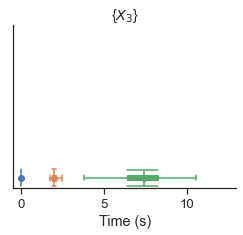

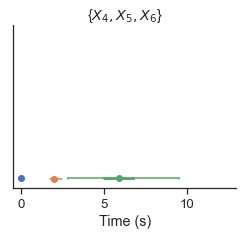

In [57]:
var_groups = ['{$X_3$}', '{$X_4, X_5, X_6$}']
for k, grp in enumerate(['Important, uncorrelated', 'Unimportant, uncorrelated']):
    fig,ax = plt.subplots(figsize=(4,3))
    plt.ylim(-.1, 1.5)
    plt.xlim(-.5, 13)
    plt.xlabel('Time (s)')
    #plt.ylabel('Error')
    d = df2[df2['Variable type'] == grp]
    colors = ['b', 'orange', 'g']

    for i, method in enumerate(['Dropout', 'LazyVI', 'Retrain']):

        d2 = d[d.method==method]
        boxplot_2d(d2.time, d2.Error, ax=ax, co=sns.color_palette()[i], method=method)
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        ax.axes.yaxis.set_ticks([])
        plt.title(var_groups[k])



In [46]:
df2

,variable,method,time,vi,train_loss,test_loss,se,true_vi,hit,Error,Variable type
1,X1,Dropout,0.000000,2.227827,2.257530,2.249931,0.082616,0.984375,0,1.243452,"Important, correlated"
2,X1,LazyVI,2.502235,1.054617,1.021606,1.076720,0.038148,0.984375,1,0.070242,"Important, correlated"
3,X1,Retrain,8.461645,1.030028,0.992091,1.052132,0.036835,0.984375,1,0.045653,"Important, correlated"
4,X2,Dropout,0.000000,1.489278,1.410448,1.511382,0.054488,0.630000,0,0.859278,"Important, correlated"
5,X2,LazyVI,1.982270,0.711587,0.642009,0.733691,0.026371,0.630000,0,0.081587,"Important, correlated"
...,...,...,...,...,...,...,...,...,...,...,...
1895,X5,LazyVI,1.722440,-0.013234,0.012345,0.013588,0.001087,0.000000,0,-0.013234,"Unimportant, uncorrelated"
1896,X5,Retrain,3.536501,-0.007830,0.017642,0.018991,0.000979,0.000000,0,-0.007830,"Unimportant, uncorrelated"
1897,X6,Dropout,0.000000,0.001796,0.024107,0.028617,0.000451,0.000000,0,0.001796,"Unimportant, uncorrelated"
1898,X6,LazyVI,1.725874,-0.013141,0.011876,0.013681,0.001060,0.000000,0,-0.013141,"Unimportant, uncorrelated"


Text(0, 0.5, 'Coverage')

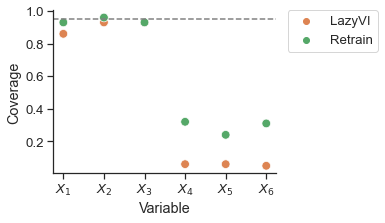

In [49]:
fig,ax = plt.subplots(figsize=(4,3))
df2['Variable'] = df2.variable.apply(lambda x: f'$X_{x[1]}$')
sns.scatterplot(x='Variable', y='hit', hue='method', s=75, palette=[sns.color_palette()[1], sns.color_palette()[2]],
                data=df2[df2.method!='Dropout'].groupby(['Variable', 'method']).hit.mean().reset_index())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(.95, linestyle='--', color='grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Variable')
plt.ylabel('Coverage')

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

def boxplot_2d(x,y, ax, co='g', whis=1.5, method=''):
    xlimits = [np.percentile(x, q) for q in (25, 50, 75)]
    ylimits = [np.percentile(y, q) for q in (25, 50, 75)]

    ##the box
    box = Rectangle(
        (xlimits[0],ylimits[0]),
        (xlimits[2]-xlimits[0]),
        (ylimits[2]-ylimits[0]),
        ec = co,
        color = co,
        zorder=0
    )
    ax.add_patch(box)

    ##the x median
    vline = Line2D(
        [xlimits[1],xlimits[1]],[ylimits[0],ylimits[2]],
        color=co,
        zorder=1
    )
    ax.add_line(vline)

    ##the y median
    hline = Line2D(
        [xlimits[0],xlimits[2]],[ylimits[1],ylimits[1]],
        color=co,
        zorder=1
    )
    ax.add_line(hline)

    ##the central point
    ax.plot([xlimits[1]],[ylimits[1]], color=co, marker='o', label=method)

    ##the x-whisker
    ##defined as in matplotlib boxplot:
    ##As a float, determines the reach of the whiskers to the beyond the
    ##first and third quartiles. In other words, where IQR is the
    ##interquartile range (Q3-Q1), the upper whisker will extend to
    ##last datum less than Q3 + whis*IQR). Similarly, the lower whisker
    ####will extend to the first datum greater than Q1 - whis*IQR. Beyond
    ##the whiskers, data are considered outliers and are plotted as
    ##individual points. Set this to an unreasonably high value to force
    ##the whiskers to show the min and max values. Alternatively, set this
    ##to an ascending sequence of percentile (e.g., [5, 95]) to set the
    ##whiskers at specific percentiles of the data. Finally, whis can
    ##be the string 'range' to force the whiskers to the min and max of
    ##the data.
    iqr = xlimits[2]-xlimits[0]

    ##left
    left = np.min(x[x > xlimits[0]-whis*iqr])
    whisker_line = Line2D(
        [left, xlimits[0]], [ylimits[1],ylimits[1]],
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [left, left], [ylimits[0],ylimits[2]],
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##right
    right = np.max(x[x < xlimits[2]+whis*iqr])
    whisker_line = Line2D(
        [right, xlimits[2]], [ylimits[1],ylimits[1]],
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [right, right], [ylimits[0],ylimits[2]],
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##the y-whisker
    iqr = ylimits[2]-ylimits[0]

    ##bottom
    bottom = np.min(y[y > ylimits[0]-whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [bottom, ylimits[0]], 
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [xlimits[0],xlimits[2]], [bottom, bottom], 
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##top
    top = np.max(y[y < ylimits[2]+whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [top, ylimits[2]], 
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [xlimits[0],xlimits[2]], [top, top], 
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_bar)

<AxesSubplot:xlabel='variable', ylabel='time'>

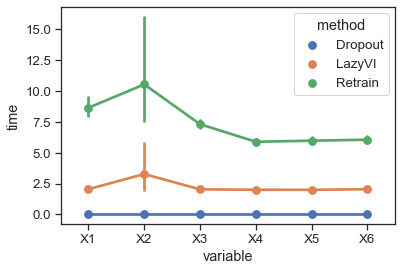

In [20]:
sns.pointplot(x='variable', y='time', hue='method', data=df2, linewidth=.5)

In [48]:
grp = df2.groupby(['Variable type', 'method'])[['Error', 'time']].agg(['mean', 'se']).reset_index()
grp.columns = ['Variable type', 'Method', 'Average Error', 'error_se', 'Average Time (s)', 'time_se']

grp1 = grp[grp['Variable type'] == 'Important, correlated']
grp2 = grp[grp['Variable type'] == 'Important, uncorrelated']
grp3 = grp[grp['Variable type'] == 'Unimportant, uncorrelated']

In [75]:
df2.groupby(['Variable type', 'method'])[['Error', 'time']].describe()

Error                                \
                                   count      mean       std       min   
Variable type             method                                         
Important, correlated     Dropout  200.0  0.980774  0.224542  0.622753   
                          LazyVI   200.0  0.017682  0.032859 -0.061772   
                          Retrain  200.0  0.010858  0.029566 -0.083901   
Important, uncorrelated   Dropout  100.0 -0.000878  0.038990 -0.076111   
                          LazyVI   100.0 -0.000850  0.039820 -0.080054   
                          Retrain  100.0  0.004876  0.039352 -0.078475   
Unimportant, uncorrelated Dropout  300.0  0.000542  0.000908 -0.002134   
                          LazyVI   300.0 -0.007128  0.003709 -0.014069   
                          Retrain  300.0 -0.002280  0.002654 -0.009288   

                                                                           \
                                        25%       50%       75%       max   
Variable type             method                                            
Important, correlated     Dropout  0.771055  0.962127  1.193443  1.417828   
                          LazyVI  -0.002774  0.013766  0.035181  0.126448   
                          Retrain -0.009779  0.012936  0.028519  0.092185   
Important, uncorrelated   Dropout -0.030115 -0.000818  0.023917  0.136236   
                          LazyVI  -0.029197 -0.003154  0.025751  0.133327   
                          Retrain -0.023075  0.001394  0.030686  0.134148   
Unimportant, uncorrelated Dropout  0.000008  0.000556  0.001130  0.003458   
                          LazyVI  -0.010058 -0.007591 -0.004308  0.001496   
                          Retrain -0.004183 -0.002097 -0.000436  0.004270   

                                    time                                 \
                                   count      mean        std       min   
Variable type             method                                          
Important, correlated     Dropout  200.0  0.000000   0.000000  0.000000   
                          LazyVI   200.0  2.659287   8.883504  1.730830   
                          Retrain  200.0  9.592455  18.341927  3.667213   
Important, uncorrelated   Dropout  100.0  0.000000   0.000000  0.000000   
                          LazyVI   100.0  2.030389   0.288131  1.737907   
                          Retrain  100.0  7.308107   1.681528  3.202473   
Unimportant, uncorrelated Dropout  300.0  0.000000   0.000000  0.000000   
                          LazyVI   300.0  2.012248   0.252753  1.722440   
                          Retrain  300.0  5.973526   1.401764  2.840108   

                                                                             
                                        25%       50%       75%         max  
Variable type             method                                             
Important, correlated     Dropout  0.000000  0.000000  0.000000    0.000000  
                          LazyVI   1.864854  1.968947  2.105026  127.595896  
                          Retrain  6.660850  8.044276  9.237641  262.581621  
Important, uncorrelated   Dropout  0.000000  0.000000  0.000000    0.000000  
                          LazyVI   1.865117  1.948569  2.101740    3.853890  
                          Retrain  6.367567  7.433726  8.260214   12.871579  
Unimportant, uncorrelated Dropout  0.000000  0.000000  0.000000    0.000000  
                          LazyVI   1.847130  1.979865  2.080957    4.115843  
                          Retrain  5.001879  5.910237  6.826786   11.347859

<ErrorbarContainer object of 3 artists>

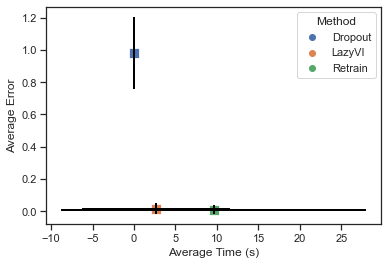

In [51]:
sns.scatterplot(x='Average Time (s)', y='Average Error', hue='Method', data=grp1, marker=',', s=100)


plt.errorbar(x=grp1['Average Time (s)'], 
             y=grp1['Average Error'], 
             xerr = grp1.time_se, 
             yerr = grp1.error_se, capsize=0, ls='none', color='black', 
            elinewidth=2)


<ErrorbarContainer object of 3 artists>

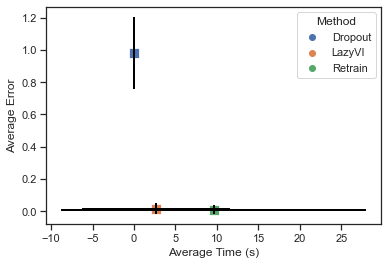

In [50]:
sns.scatterplot(x='Average Time (s)', y='Average Error', hue='Method', data=grp1, marker=',', s=100)


plt.errorbar(x=grp1['Average Time (s)'], 
             y=grp1['Average Error'], 
             xerr = grp1.time_se, 
             yerr = grp1.error_se, capsize=0, ls='none', color='black', 
            elinewidth=2)


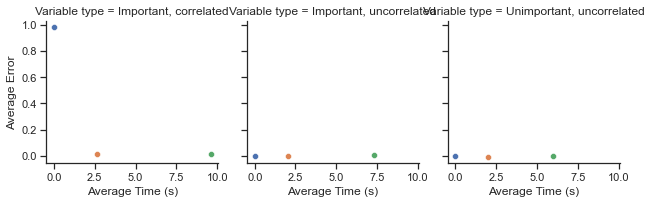

In [34]:
g = sns.FacetGrid(grp, col="Variable type", hue="Method")
g.map(sns.scatterplot, "Average Time (s)", "Average Error")

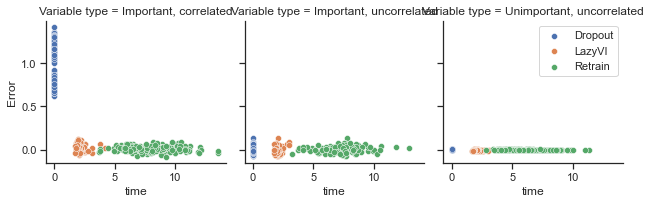

In [25]:
sns.set_theme(style="ticks")

g = sns.FacetGrid(df2[df2.time<30], col="Variable type", hue="method")
g.map(sns.scatterplot, "time", "Error")
plt.ylabel('$\hat{VI}_1 - VI_1$')
plt.legend()

In [180]:
xlimits = [np.percentile(d2.time, q) for q in (25, 50, 75)]
ylimits = [np.percentile(d2.Error, q) for q in (25, 50, 75)]

ylimits

[-0.009778725095093255, 0.012935592792928163, 0.028519209213554858]

AttributeError: 'DataFrame' object has no attribute 'Error'

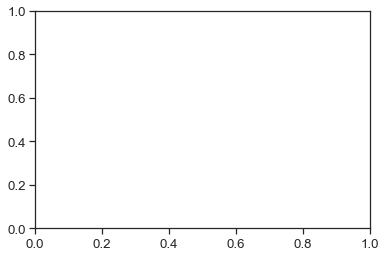

In [201]:
fig,ax = plt.subplots()
boxplot_2d(d2.time, d2.Error, ax=ax)

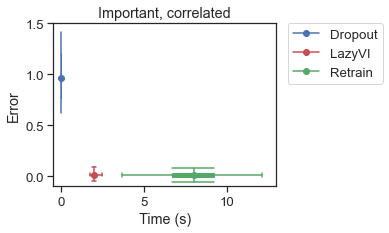

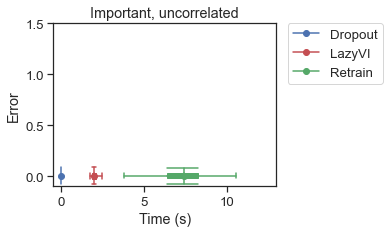

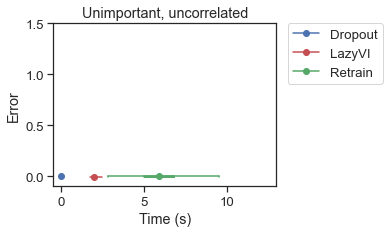

In [240]:


for grp in ['Important, correlated', 'Important, uncorrelated', 'Unimportant, uncorrelated']:
    fig,ax = plt.subplots(figsize=(4,3))
    plt.ylim(-.1, 1.5)
    plt.xlim(-.5, 13)
    plt.xlabel('Time (s)')
    plt.ylabel('Error')
    d = df2[df2['Variable type'] == grp]
    colors = ['b', 'r', 'g']

    for i, method in enumerate(['Dropout', 'LazyVI', 'Retrain']):
        d2 = d[d.method==method]
        boxplot_2d(d2.time, d2.Error, ax=ax, co=colors[i], method=method)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.title(grp)



In [173]:
d.groupby(['Variable type', 'method']).describe()

time                                           \
                               count      mean        std       min       25%   
Variable type         method                                                    
Important, correlated Dropout  200.0  0.000000   0.000000  0.000000  0.000000   
                      LazyVI   200.0  2.659287   8.883504  1.730830  1.864854   
                      Retrain  200.0  9.592455  18.341927  3.667213  6.660850   

                                                                  vi  \
                                    50%       75%         max  count   
Variable type         method                                           
Important, correlated Dropout  0.000000  0.000000    0.000000  200.0   
                      LazyVI   1.968947  2.105026  127.595896  200.0   
                      Retrain  8.044276  9.237641  262.581621  200.0   

                                         ...  hit       Error            \
                                   mean  ...  75%  max  count      mean   
Variable type         method             ...                              
Important, correlated Dropout  1.787962  ...  0.0  0.0  200.0  0.980774   
                      LazyVI   0.824870  ...  1.0  1.0  200.0  0.017682   
                      Retrain  0.818046  ...  1.0  1.0  200.0  0.010858   

                                                                       \
                                    std       min       25%       50%   
Variable type         method                                            
Important, correlated Dropout  0.224542  0.622753  0.771055  0.962127   
                      LazyVI   0.032859 -0.061772 -0.002774  0.013766   
                      Retrain  0.029566 -0.083901 -0.009779  0.012936   

                                                   
                                    75%       max  
Variable type         method                       
Important, correlated Dropout  1.193443  1.417828  
                      LazyVI   0.035181  0.126448  
                      Retrain  0.028519  0.092185  

[3 rows x 64 columns]